# Data Analysis
Exploratory analysis and visualization of S&P 500 historical data.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the actual column names
columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]

In [3]:
# Read CSV: skip header garbage, use header row, and parse date
df = pd.read_csv(
    "sp500.csv",
    skiprows=3, # skip metadata lines
    names=columns, # assign column names
    header=None, # no header row in the file
    parse_dates=["Date"]
)


# Drop potential duplicate columns if they appear
df = df.loc[:, ~df.columns.duplicated()]
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.199951,2072.360107,2046.040039,2058.899902,2708700000,NaN
1,2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,NaN
2,2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,NaN
3,2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,NaN
4,2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,NaN


In [4]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Check the percentage of missing values
percent_missing = (missing / len(df)) * 100
print("\nPercentage of missing values:\n", percent_missing)


Missing values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume       2515
dtype: int64

Percentage of missing values:
 Date           0.0
Open           0.0
High           0.0
Low            0.0
Close          0.0
Adj Close      0.0
Volume       100.0
dtype: float64


In [5]:
# Drop the Volume column
df = df.drop(columns=["Volume"])

# Save to a new CSV
df.to_csv("sp500_no_volume.csv", index=False)

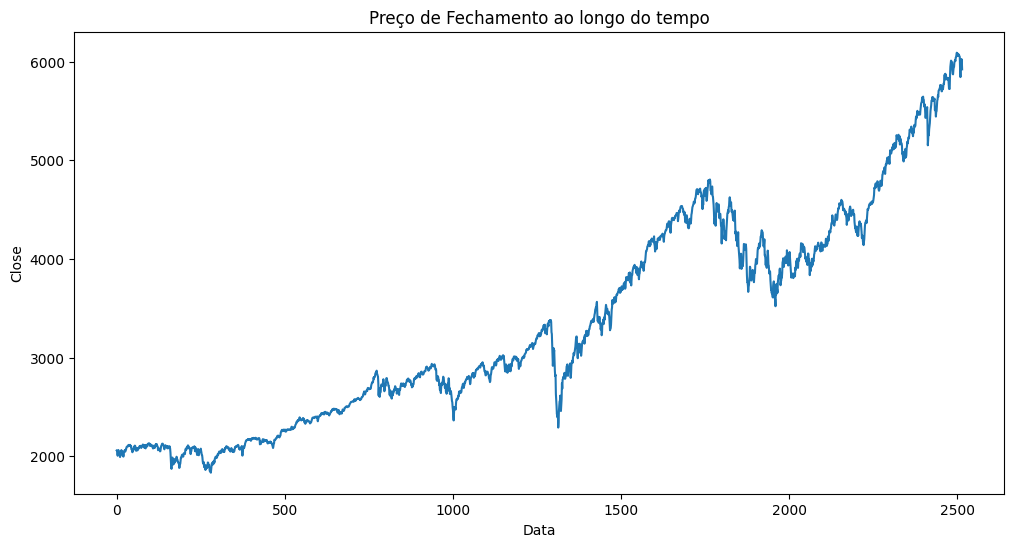

In [6]:
# Plot the closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Preço de Fechamento ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Close')
plt.show()

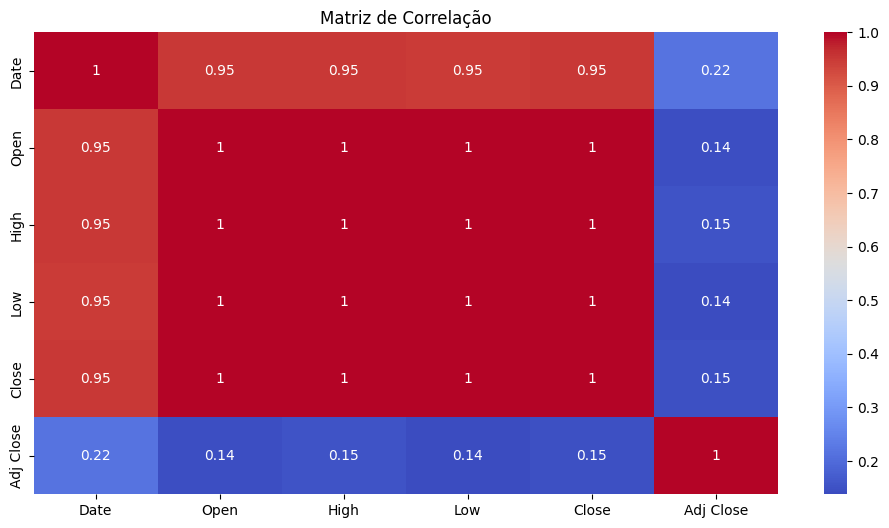

In [7]:
# Plot the distribution of closing prices
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()